In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
def confidence_interval (data, rep=100, coeff=1.96): #default 95%
    data_avg=np.mean(data,axis=1)
    data_std=np.std(data,axis=1)
    max_val=data_avg+coeff*data_std/np.sqrt(rep)
    min_val=data_avg-coeff*data_std/np.sqrt(rep)
    return data_avg, data_std, max_val, min_val

def plot_confidence_interval (plt, data, x_axis, color):
    data_avg, data_std, max_val, min_val = confidence_interval (data)
    plt.fill_between(x_axis, data_avg, max_val, alpha=0.3, color=color)
    plt.fill_between(x_axis, min_val, data_avg, alpha=0.3, color=color)
    
def convert_label(label,peerid):
    load, tx_batches ,buff_raw, pub_num, sub_num = label.split(" ")
    buff = buff_raw[0:-8]
    return [int(load),int(tx_batches),int(buff),int(pub_num),int(peerid)]

def struct_data(data,peerid):
    structed_data = []
    index = 0
    while index < len(data)-1:
        if data[index]=='\n':
            flag = convert_label(data[index+1],peerid)
            index += 2
            while data[index]!='\n' and index<len(data)-1:
                structed_data.append(flag+data[index].split(" "))
                index += 1
    return np.array(structed_data)

In [34]:
thr_sub_files=["thr_sub1.txt","thr_sub2.txt","thr_sub3.txt","thr_sub4.txt","thr_sub5.txt"]
mem_sub_files=["mem_sub1.txt","mem_sub2.txt","mem_sub3.txt","mem_sub4.txt","mem_sub5.txt"]
mem_pub_files=["mem_pub1.txt","mem_pub2.txt","mem_pub3.txt","mem_pub4.txt","mem_pub5.txt"]

In [45]:
#Read throuthput log file and convert to data frame
def read_thr(filename,peerid):
    f = open("./logs_multiple/"+filename,'r')
    data = f.readlines()
    f.close()
    df_thr= pd.DataFrame(struct_data(data,peerid)[:,0:6], columns=["payload","tx_batches","sub_buff","pubsubnum","peerID","throughput"]) 
    df_thr["throughput"]=df_thr["throughput"].map(lambda e: float(e))
    df_thr["payload"]=df_thr["payload"].map(lambda e: int(e))
    df_thr["tx_batches"]=df_thr["tx_batches"].map(lambda e: int(e))
    df_thr["sub_buff"]=df_thr["sub_buff"].map(lambda e: int(e))
    df_thr["pubsubnum"]=df_thr["pubsubnum"].map(lambda e: int(e))
    df_thr["peerID"]=df_thr["peerID"].map(lambda e: int(e))
    return df_thr
# Read subscriber's memory usage log file and convert to data frame
def read_sub_mem(filename,peerid):
    f = open("./logs_multiple/"+filename,'r')
    data = f.readlines()
    f.close()
    df_mem_sub=pd.DataFrame(struct_data(data,peerid)[:,0:8], columns=["payload","tx_batches","sub_buff","pubsubnum","peerID","total_mem","RSS","shared_mem"]) 
    df_mem_sub["payload"]=df_mem_sub["payload"].map(lambda e: int(e))
    df_mem_sub["sub_buff"]=df_mem_sub["sub_buff"].map(lambda e: int(e))
    df_mem_sub["pubsubnum"]=df_mem_sub["pubsubnum"].map(lambda e: int(e))
    df_mem_sub["peerID"]=df_mem_sub["peerID"].map(lambda e: int(e))
    df_mem_sub["tx_batches"]=df_mem_sub["tx_batches"].map(lambda e: int(e))
    df_mem_sub["total_mem"]=df_mem_sub["total_mem"].map(lambda e: int(e)*4096)
    df_mem_sub["RSS"]=df_mem_sub["RSS"].map(lambda e: int(e)*4096)
    df_mem_sub["shared_mem"]=df_mem_sub["shared_mem"].map(lambda e: int(e)*4096)
    return df_mem_sub

# # Read publisher's memory usage log file and convert to data frame
def read_pub_mem(filename,peerid):
    f = open("./logs_multiple/"+filename,'r')
    data = f.readlines()
    f.close()
    df_mem_pub=pd.DataFrame(struct_data(data,peerid)[:,0:8], columns=["payload","tx_batches","sub_buff","pubsubnum","peerID","total_mem","RSS","shared_mem"]) 
    df_mem_pub["payload"]=df_mem_pub["payload"].map(lambda e: int(e))
    df_mem_pub["sub_buff"]=df_mem_pub["sub_buff"].map(lambda e: int(e))
    df_mem_pub["pubsubnum"]=df_mem_pub["pubsubnum"].map(lambda e: int(e))
    df_mem_pub["peerID"]=df_mem_pub["peerID"].map(lambda e: int(e))
    df_mem_pub["tx_batches"]=df_mem_pub["tx_batches"].map(lambda e: int(e))
    df_mem_pub["total_mem"]=df_mem_pub["total_mem"].map(lambda e: int(e)*4096)
    df_mem_pub["RSS"]=df_mem_pub["RSS"].map(lambda e: int(e)*4096)
    df_mem_pub["shared_mem"]=df_mem_pub["shared_mem"].map(lambda e: int(e)*4096)
    return df_mem_pub

In [60]:
df_thr_raw=[]
df_mem_sub_raw=[]
df_mem_pub_raw=[]
for i in range(len(thr_sub_files)):
    df_thr_raw.append(read_thr(thr_sub_files[i],i+1))
    df_mem_sub_raw.append(read_sub_mem(mem_sub_files[i],i+1))
    df_mem_pub_raw.append(read_pub_mem(mem_pub_files[i],i+1))

df_thr=pd.concat(df_thr_raw, ignore_index=True)
df_mem_sub=pd.concat(df_mem_sub_raw, ignore_index=True)
df_mem_pub=pd.concat(df_mem_pub_raw, ignore_index=True)

In [64]:
df_thr

,payload,tx_batches,sub_buff,pubsubnum,peerID,throughput
0,8,4,64,1,1,1.549587e+06
1,8,4,64,1,1,1.672103e+06
2,8,4,64,1,1,1.649952e+06
3,8,4,64,1,1,1.562905e+06
4,8,4,64,1,1,1.671840e+06
...,...,...,...,...,...,...
67490,1024000,4,1024,5,5,3.215096e+02
67491,1024000,4,1024,5,5,4.343688e+02
67492,1024000,4,1024,5,5,4.653666e+02
67493,1024000,4,1024,5,5,3.920443e+02


In [65]:
df_mem_sub

,payload,tx_batches,sub_buff,pubsubnum,peerID,total_mem,RSS,shared_mem
0,8,4,64,2,1,494624768,15032320,6332416
1,8,4,64,2,1,494624768,15032320,6332416
2,8,4,64,2,1,494624768,15032320,6332416
3,8,4,64,2,1,494624768,15032320,6332416
4,8,4,64,2,1,494624768,15032320,6332416
...,...,...,...,...,...,...,...,...
71021,1024000,4,512,5,5,494809088,13287424,6123520
71022,1024000,4,512,5,5,494809088,13090816,6123520
71023,1024000,4,512,5,5,494809088,13287424,6123520
71024,1024000,4,512,5,5,494809088,13156352,6123520


In [66]:
df_mem_pub

,payload,tx_batches,sub_buff,pubsubnum,peerID,total_mem,RSS,shared_mem
0,8,4,64,2,1,494620672,8400896,6279168
1,8,4,64,2,1,494620672,8400896,6279168
2,8,4,64,2,1,494620672,8400896,6279168
3,8,4,64,2,1,494620672,8400896,6279168
4,8,4,64,2,1,494620672,8400896,6279168
...,...,...,...,...,...,...,...,...
76004,1024000,4,1024,5,5,495697920,13897728,6524928
76005,1024000,4,1024,5,5,495697920,13873152,6524928
76006,1024000,4,1024,5,5,495697920,13873152,6524928
76007,1024000,4,1024,5,5,495697920,13873152,6524928


In [83]:
payload_group = df_mem_pub.groupby(by="payload")
plot_group = payload_group.get_group(64)
pubsubnum_group = plot_group.groupby(by="pubsubnum")
temp1 = pubsubnum_group.get_group(3)
temp2 = temp1.groupby(by="sub_buff",sort=True)
temp3 = temp2.get_group(64)
temp4 = temp3.groupby(by="peerID",sort=True)
temp5 = temp4.get_group(1)
len(temp5)

177

Text(0.5, 1.0, "Total publsihers' MAX RSS memory usage \n(with same number of subscribers, tx_batches=4)")

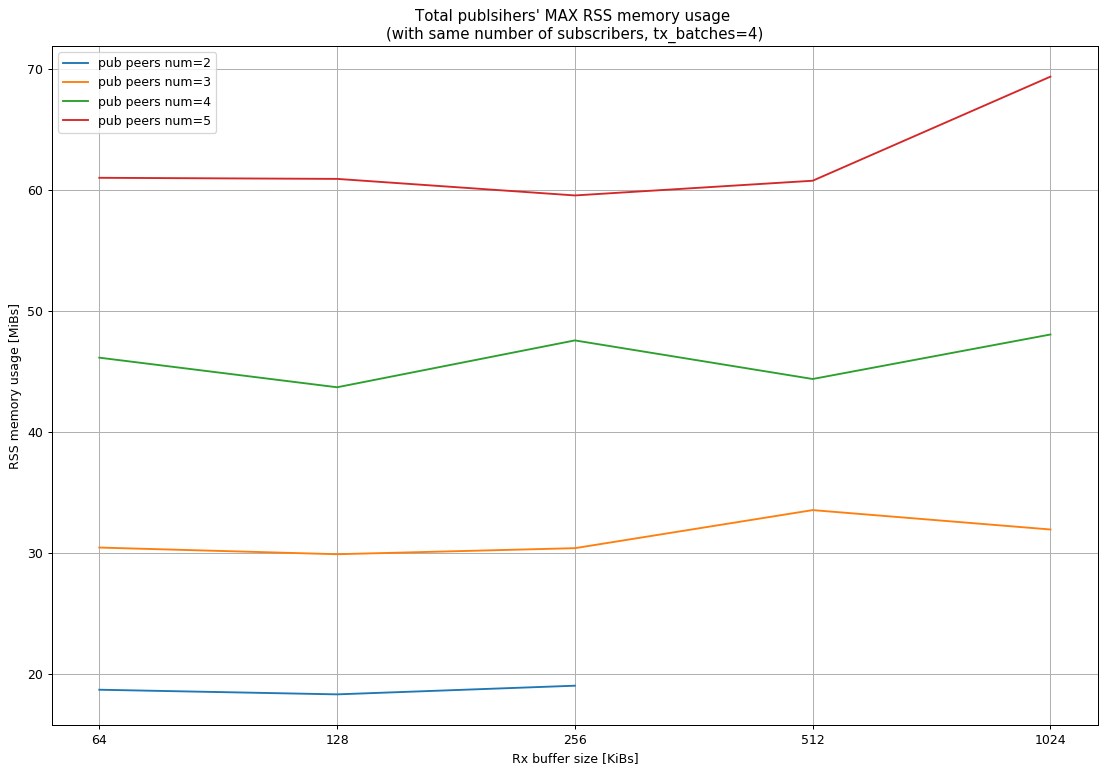

In [180]:
plot_payload=1024000
plt.figure(figsize=(15,10),dpi=90)
payload_group = df_mem_pub.groupby(by="payload")
plot_group = payload_group.get_group(plot_payload)
pubsubnum_group = plot_group.groupby(by="pubsubnum")

for g_name,g_buff in pubsubnum_group: 
    groups = g_buff.groupby(by="sub_buff",sort=True)
    y_axis = []
    x_axis = []
    for name, group in groups:
            x_axis.append(name)
           
            peer_groups=group.groupby(by="peerID",sort=True)
            peer_max=[]
            for n,g in peer_groups:
                peer_max.append(g.max()["RSS"]/pow(2,20))
            y_axis.append(sum(peer_max))

    plot_index = np.arange(len(x_axis))   
    
    plt.plot(plot_index,y_axis,label="pub peers num="+str(g_name))
    plt.xticks(plot_index,x_axis)

plt.legend()
plt.grid()
plt.xlabel("Rx buffer size [KiBs]")
plt.ylabel("RSS memory usage [MiBs]")
plt.title("Total publsihers' MAX RSS memory usage \n(with same number of subscribers, tx_batches=4)")



Text(0.5, 1.0, "Total subscribers' MAX RSS memory usage \n(with same number of publishers, tx_batches=4,payload=1024000)")

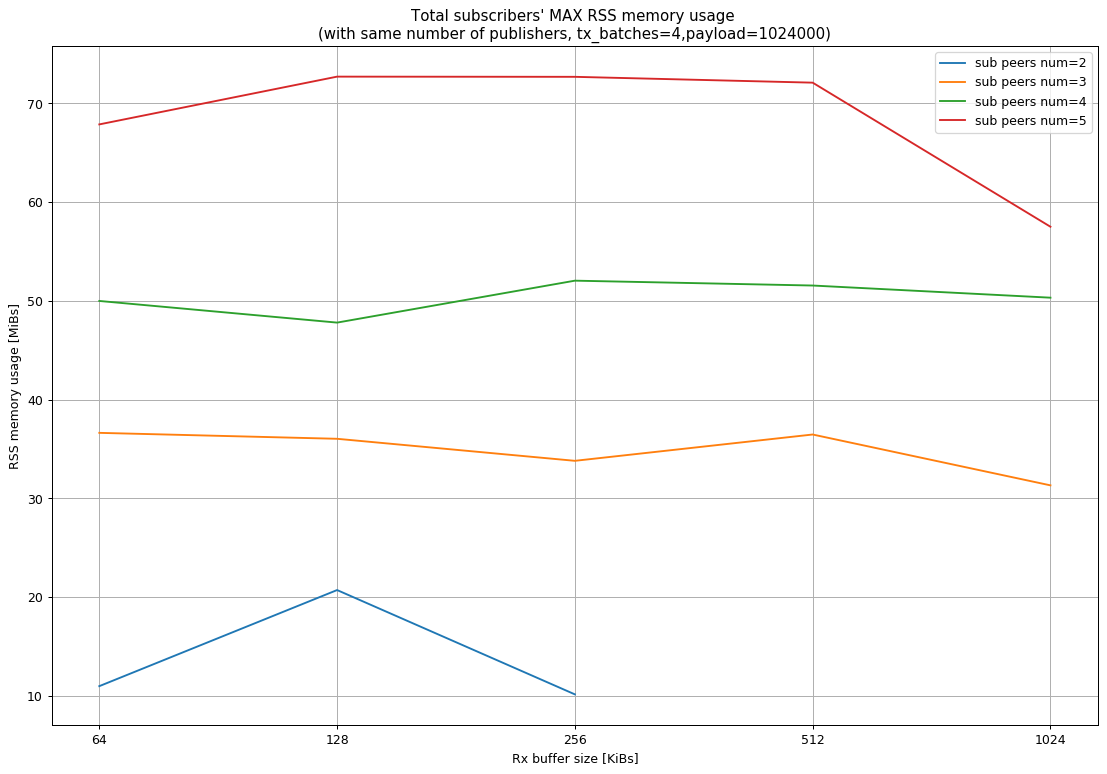

In [185]:
plot_payload=1024000
plt.figure(figsize=(15,10),dpi=90)
payload_group = df_mem_sub.groupby(by="payload")
plot_group = payload_group.get_group(plot_payload)
pubsubnum_group = plot_group.groupby(by="pubsubnum")

for g_name,g_buff in pubsubnum_group: 
    groups = g_buff.groupby(by="sub_buff",sort=True)
    y_axis = []
    x_axis = []
    for name, group in groups:
            x_axis.append(name)
           
            peer_groups=group.groupby(by="peerID",sort=True)
            peer_max=[]
            for n,g in peer_groups:
                peer_max.append(g.max()["RSS"]/pow(2,20))
            y_axis.append(sum(peer_max))

    plot_index = np.arange(len(x_axis))   
    
    plt.plot(plot_index,y_axis,label="sub peers num="+str(g_name))
    plt.xticks(plot_index,x_axis)

plt.legend()
plt.grid()
plt.xlabel("Rx buffer size [KiBs]")
plt.ylabel("RSS memory usage [MiBs]")
plt.title("Total subscribers' MAX RSS memory usage \n(with same number of publishers, tx_batches=4,payload="+str(plot_payload)+")")

In [129]:
peer_group = df_thr.groupby(by=["pubsubnum"])
plot_group =  peer_group.get_group(5)
buff_group = plot_group.groupby(by=["sub_buff"])
group128 = buff_group.get_group(128)
group128

,payload,tx_batches,sub_buff,pubsubnum,peerID,throughput
18050,8,4,128,5,1,3.187691e+05
18051,8,4,128,5,1,1.197993e+06
18052,8,4,128,5,1,8.217178e+05
18053,8,4,128,5,1,5.667020e+05
18054,8,4,128,5,1,1.549202e+06
...,...,...,...,...,...,...
67341,1024000,4,128,5,5,5.077934e+02
67342,1024000,4,128,5,5,6.606363e+02
67343,1024000,4,128,5,5,7.817263e+02
67344,1024000,4,128,5,5,1.016306e+03


([<matplotlib.axis.XTick at 0x7fe671395210>,
 <a list of 5 Text xticklabel objects>)

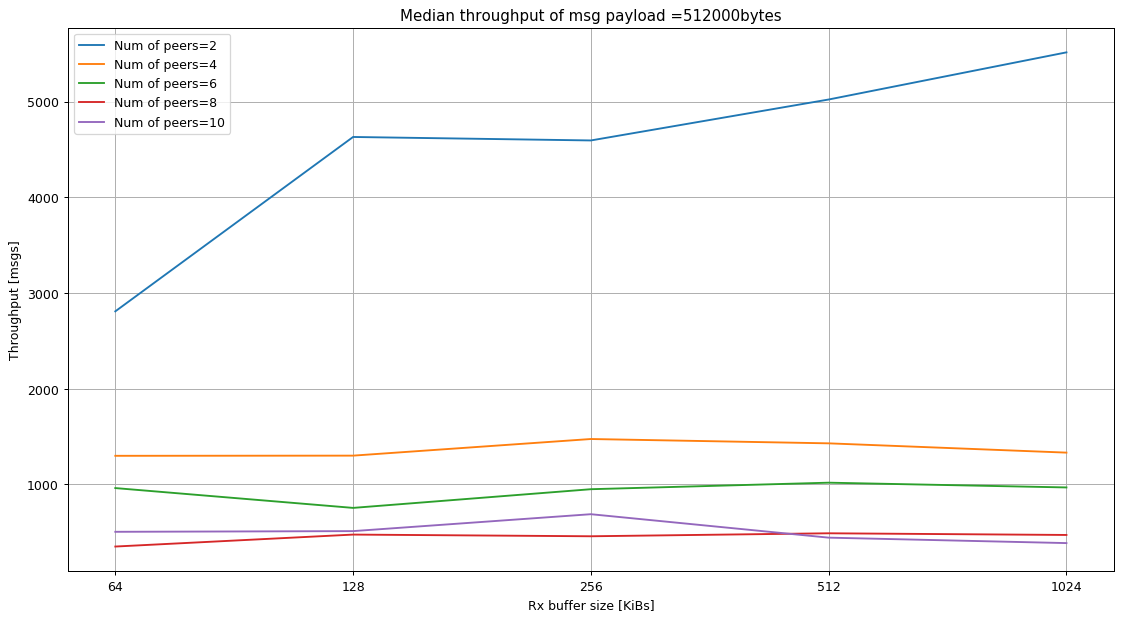

In [168]:
payload = 512000
payload_group = df_thr.groupby(by=["payload"])
plot_group =  payload_group.get_group(payload)
pubsub_group=plot_group.groupby(by=["pubsubnum"])
plt.figure(figsize=(15,8),dpi=90)
for g_name,g_pubsub in pubsub_group: 
    buffer_group = g_pubsub.groupby(by="sub_buff",sort=True)
    median_thr = []
    x_real = []
    for name,group in buffer_group:
        x_real.append(name)
        median_thr.append(group.median()["throughput"])
    plot_index = np.arange(len(median_thr))
    plt.plot(plot_index,median_thr,label="Num of peers="+str(g_name*2))

    plt.legend()
plt.grid()
plt.xlabel("Rx buffer size [KiBs]")
plt.ylabel("Throughput [msgs]")
# plt.yscale("log")
# plt.xscale("log",basex=2)
plt.title("Median throughput of msg payload ="+str(payload)+ "bytes")
plt.xticks(np.arange(len(x_real)),x_real)

([<matplotlib.axis.XTick at 0x7fe675948ad0>,
 <a list of 18 Text xticklabel objects>)

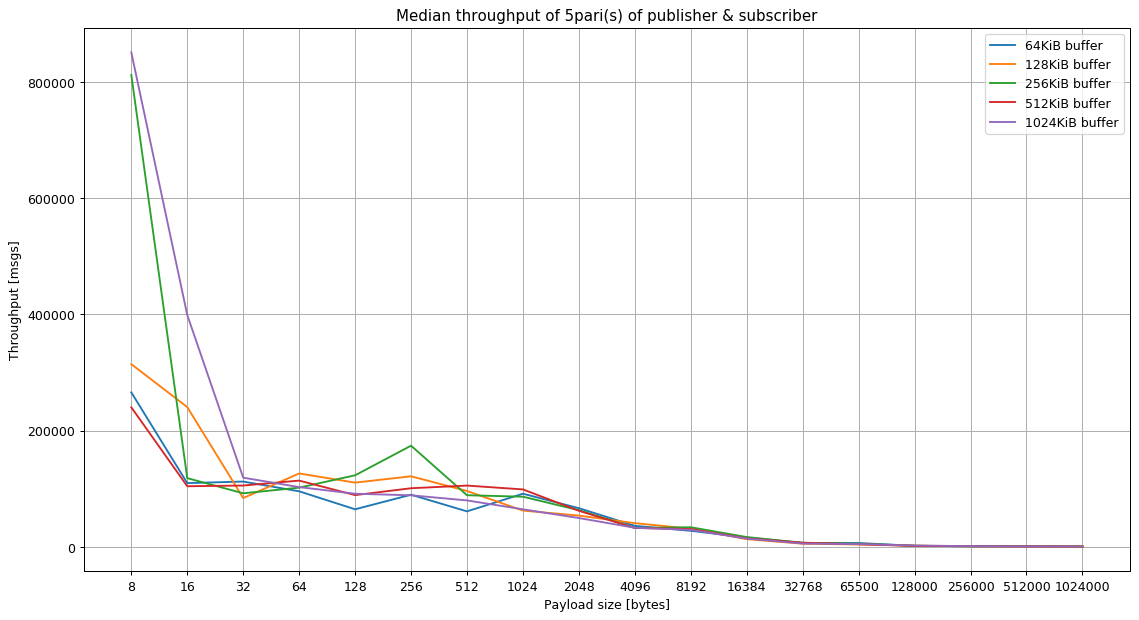

In [162]:
# Simple plot of throughtput
pairs =5
plt.figure(figsize=(15,8),dpi=90)
peer_group = df_thr.groupby(by=["pubsubnum"])
plot_group =  peer_group.get_group(pairs)
buff_group = plot_group.groupby(by=["sub_buff"])
x_real = []
for g_name,g_buff in buff_group: 
#     group128 = buff_group.get_group("128KiB")
    msg_group = g_buff.groupby(by="payload",sort=True)
    mean_thr = []
    x_real = []
    for name, group in msg_group:
            x_real.append(name)
            mean_thr.append(group.median()["throughput"])

    plot_index = np.arange(len(mean_thr))

    plt.plot(plot_index,mean_thr,label=str(g_name)+"KiB buffer")
    
    
 
    
    
    
    
plt.legend()
plt.grid()
plt.xlabel("Payload size [bytes]")
plt.ylabel("Throughput [msgs]")
# plt.yscale("log")
# plt.xscale("log",basex=2)
plt.title("Median throughput of "+str(pairs)+ "pari(s) of publisher & subscriber")
plt.xticks(np.arange(len(x_real)),x_real)

[64, 128, 256, 512, 1024]


Text(0.5, 1.0, 'Throutput of payload size 1024 (95% C.I.)')

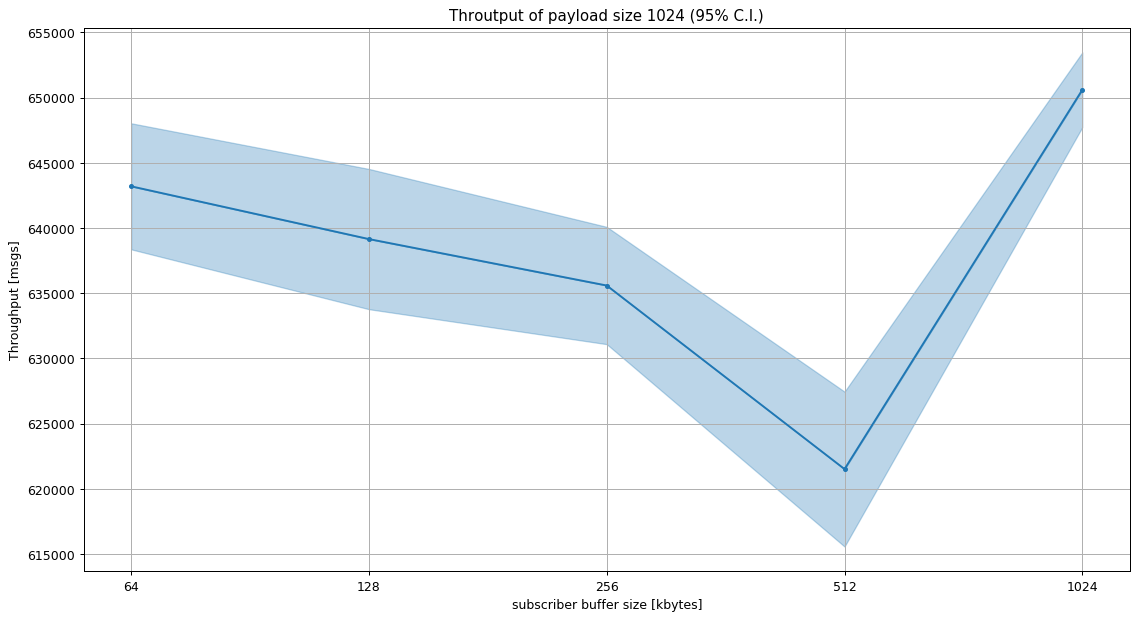

In [17]:
payload_size = 1024
df_thr_batch = df_thr.groupby(by=["tx_batches"])
df_to_plot = df_thr_batch.get_group(4)
df_thr_payload=df_to_plot.groupby(by=["payload"])
g = df_thr_payload.get_group(payload_size)

buff_group = []
buff_label = []

for label,group in g.groupby(by=["sub_buff"]):
    buff_label.append(label)
    buff_group.append(group["throughput"].tolist())

print(buff_label)

real_index= [0,1,2,3,4]


fig = plt.figure(figsize=(15,8),dpi=90)
plt.plot(real_index,np.mean(buff_group, axis=1), linestyle='-', marker='o', markersize=3, color='tab:blue')
plot_confidence_interval (plt, buff_group, real_index, "tab:blue")
plt.xticks(real_index,buff_label)
plt.grid()
plt.xlabel("subscriber buffer size [kbytes]")
plt.ylabel("Throughput [msgs]")
plt.title("Throutput of payload size "+str(payload_size)+" (95% C.I.)")

Text(0.5, 1.0, 'Publisher MAX RSS memory usage comparism with different Tx batch number and Rx buffer size')

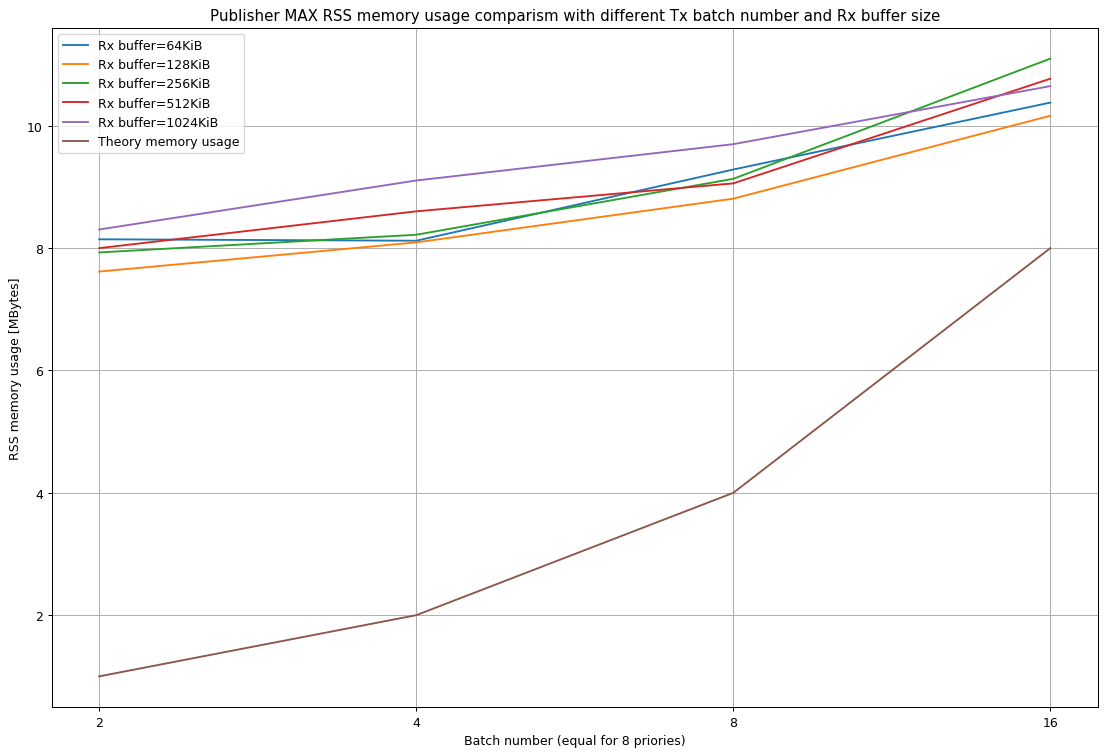

In [13]:
plt.figure(figsize=(15,10),dpi=90)
pub_buff_group = df_mem_pub.groupby(by="sub_buff")
# plot_group = pub_buff_group.get_group(64).groupby(by="tx_batches")
# plot_group
theory_plot_flag = 0
for g_name,g_buff in pub_buff_group: 
    groups = g_buff.groupby(by="tx_batches",sort=True)
    max_real = []
    batches = []
    for name, group in groups:
            batches.append(name)
            max_real.append(group.max()["RSS"]/pow(2,20))

    plot_index = np.arange(len(max_real))

#     if theory_plot_flag == 0 :
#         theory_mem=[]
#         for b in batches:
#             theory_mem.append(b*8*65536)
#         plt.plot(plot_index,theory_mem,label="Theory memory usage")
#         theory_plot_flag=1
    
    
    plt.plot(plot_index,max_real,label="Rx buffer="+str(g_name)+"KiB")
    plt.xticks(np.arange(len(batches)),batches)
    
theory_mem=[]
for b in batches:
    theory_mem.append(b*8*65536/pow(2,20))
plt.plot(plot_index,theory_mem,label="Theory memory usage")


plt.legend()
plt.grid()
plt.xlabel("Batch number (equal for 8 priories)")
plt.ylabel("RSS memory usage [MBytes]")
plt.title("Publisher MAX RSS memory usage comparism with different Tx batch number and Rx buffer size")




Text(0.5, 1.0, 'Subscriber MAX RSS memory usage comparism with different Tx batch number and Rx buffer size')

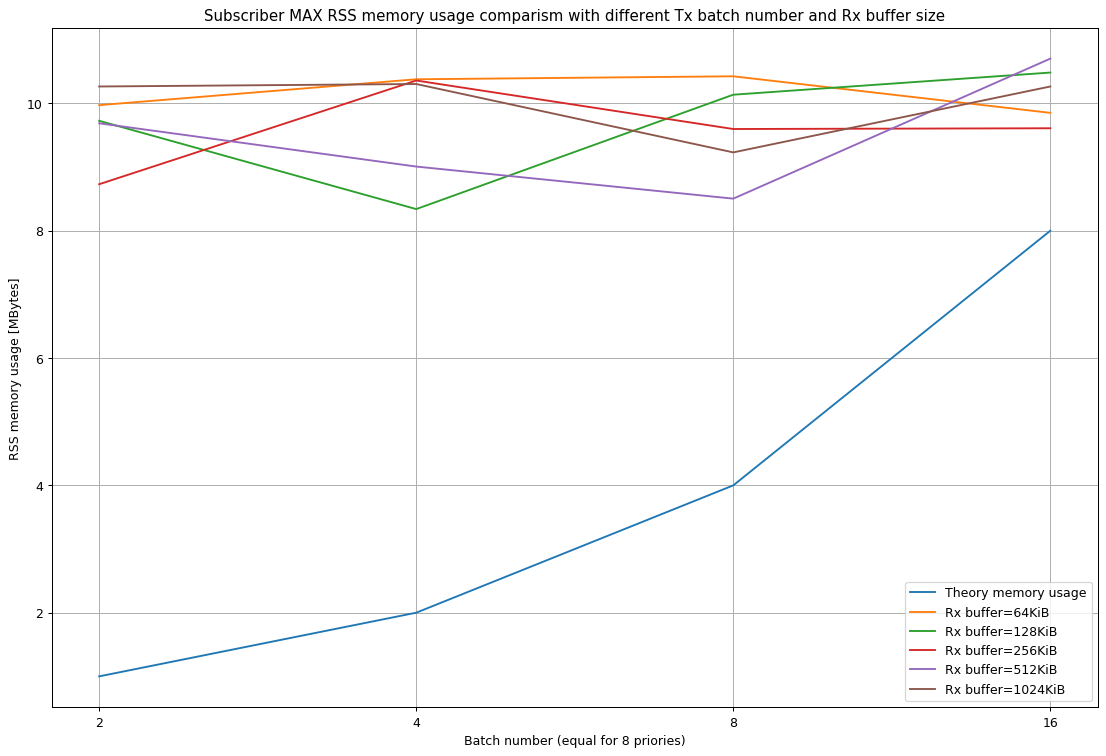

In [16]:
plt.figure(figsize=(15,10),dpi=90)
sub_buff_group = df_mem_sub.groupby(by="sub_buff")
# plot_group = pub_buff_group.get_group(64).groupby(by="tx_batches")
# plot_group
theory_plot_flag = 0
for g_name,g_buff in sub_buff_group: 
    groups = g_buff.groupby(by="tx_batches",sort=True)
    max_real = []
    batches = []
    for name, group in groups:
            batches.append(name)
            max_real.append(group.max()["RSS"]/pow(2,20))

    plot_index = np.arange(len(max_real))

    if theory_plot_flag == 0 :
        theory_mem=[]
        for b in batches:
            theory_mem.append(b*8*65536/pow(2,20))
        plt.plot(plot_index,theory_mem,label="Theory memory usage")
        theory_plot_flag=1
    
    
    plt.plot(plot_index,max_real,label="Rx buffer="+str(g_name)+"KiB")
    plt.xticks(np.arange(len(batches)),batches)
    

            


plt.legend()
plt.grid()
plt.xlabel("Batch number (equal for 8 priories)")
plt.ylabel("RSS memory usage [MBytes]")
plt.title("Subscriber MAX RSS memory usage comparism with different Tx batch number and Rx buffer size")

Text(0.5, 1.0, 'Throutput of payload size 16')

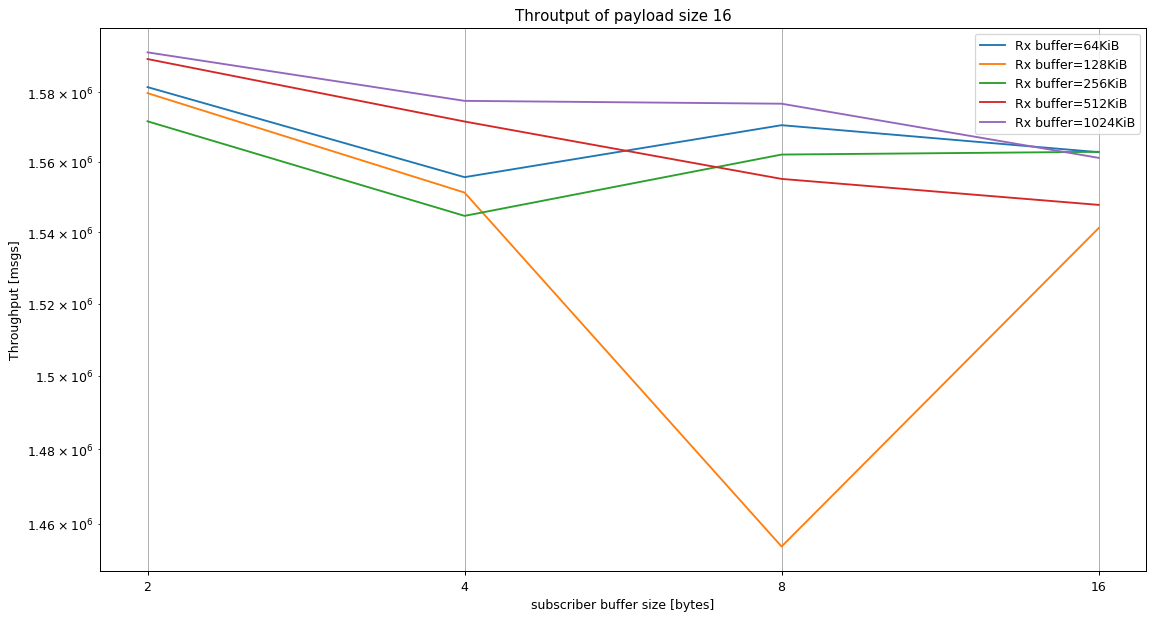

In [32]:
payload_size = 16
df_thr_payload=df_thr.groupby(by=["payload"])
plot_group = df_thr_payload.get_group(payload_size)


fig = plt.figure(figsize=(15,8),dpi=90)
for label,groups in plot_group.groupby(by=["sub_buff"]):
    x_real = []
    y_throughput = []
    for name,group in groups.groupby(by="tx_batches"):
        x_real.append(name)
        y_throughput.append(group.mean()["throughput"])
    
    plt.plot(np.arange(len(x_real)),y_throughput,label="Rx buffer="+str(label)+"KiB")
    plt.xticks(np.arange(len(x_real)),x_real)



plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("subscriber buffer size [bytes]")
plt.ylabel("Throughput [msgs]")
plt.title("Throutput of payload size "+str(payload_size))